## ⚙️ Batch Gradient Descent in Simple Linear Regression

In **Simple Linear Regression**, we try to find the best line:

$$
\hat{y} = m x + b
$$

that minimizes the **Mean Squared Error (MSE)**:

$$
L = \frac{1}{n} \sum_{i=1}^{n} (y_i - (m x_i + b))^2
$$

---

### 🔹 What is Batch Gradient Descent?

**Batch Gradient Descent** is an iterative optimization algorithm  
used to find the values of \( m \) and \( b \) that minimize the loss function.  

At each step, it updates parameters using **all data points**:

$$
m := m - \eta \cdot \frac{\partial L}{\partial m}
$$
$$
b := b - \eta \cdot \frac{\partial L}{\partial b}
$$

where \( \eta \) is the **learning rate**.

The gradients are:

$$
\frac{\partial L}{\partial m} = \frac{-2}{n} \sum x_i (y_i - (m x_i + b))
$$
$$
\frac{\partial L}{\partial b} = \frac{-2}{n} \sum (y_i - (m x_i + b))
$$

---

### 🔹 Link with OLS

OLS directly computes the best \( m \) and \( b \) using formulas (closed-form solution),  
while **Gradient Descent** gradually reaches those values **step-by-step**  
by repeatedly reducing the error.

So both aim to minimize the **same loss function**,  
but the **method of optimization** is different.

---

✅ **In short:**
> Batch Gradient Descent is an iterative way to reach the same solution  
> that OLS gives instantly — especially useful when data is large or inversion is hard.


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


In [15]:
data = pd.read_csv("Experience-Salary.csv")

In [16]:
data.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [17]:
X = data['exp(in months)'].values
Y = data['salary(in thousands)'].values

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

0.9684184511272896
0.06580218303175236


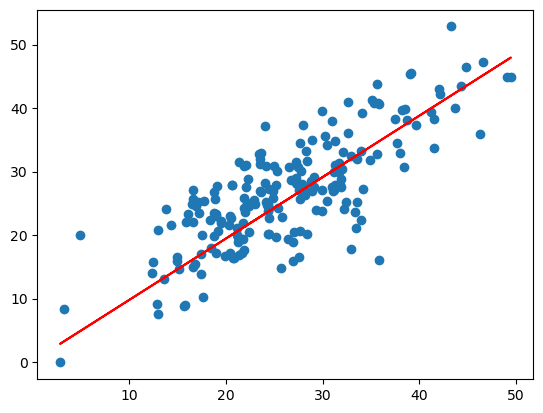

In [20]:
class BatchGradient:
    def __init__(self):
        self.m = 0
        self.b = 0
        
    def fit(self, X, y, epoches = 1000, learning_rate = 0.00001):
        for i in range(epoches):
            b_slope = (-2 / len(x_train)) * np.sum(y - self.m*X - self.b)
            m_slope = (-2  / len(x_train))  * np.sum((y - self.m*X - self.m)*X)

            self.b = self.b - (learning_rate* b_slope)
            self.m = self.m - (learning_rate* m_slope)
        print(self.m)
        print(self.b)   
    def predict(self, x_test):
        return (x_test * self.m) + self.b
          
batch = BatchGradient()
batch.fit(X, Y)
plt.scatter(x_test, y_test)
plt.plot(x_test, batch.predict(x_test), color='red')

In [ ]:
pd.DataFrame({"R2 Score":[r2_score(y_test, batch.predict(x_test))],
              "MSE":[mean_squared_error(y_test, batch.predict(x_test))]})

,R2 Score,MSE
0,0.566253,32.316249


## 📊 Model Evaluation and Observation

After training the model using **Batch Gradient Descent**,  
the evaluation metrics are as follows:

| Metric | Value |
|---------|--------|
| R² Score | 0.5662 |
| MSE | 32.3162 |

---

### 🔹 Interpretation

The **R² score (0.56)** and **MSE (32.31)** indicate that the model  
is not fitting the data very accurately yet.

However, in this notebook, the **primary objective** was not to  
achieve the best accuracy but to **implement the Batch Gradient Descent algorithm manually**  
and understand how it works mathematically and programmatically.

---

### 🔹 Why It’s Not Improved Further

The model’s performance could be improved by:
- Adjusting the **learning rate**
- Increasing the **number of epochs**
- Applying **feature scaling / normalization**
- Or using a **smaller step size**

But these steps are intentionally **not applied here**,  
because the main focus was to demonstrate the **algorithmic logic**  
rather than optimization or model tuning.

---

✅ **In short:**
> This implementation focuses on understanding **how Gradient Descent works**,  
> not on achieving high accuracy or the best-fit line.
